**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 6**
Ingeniería de características (FE)

---

*   NOMBRE: ---------------------------------------------------------
*   MATRÍCULA: ----------------------------------------------------

In [1]:
#from google.colab import drive
# drive.mount('/content/drive')

In [2]:
#import os
#DIR = "/content/drive/MyDrive/Colab Notebooks/MNA/TC4029 - Ciencia y analítica de datos/Semana 6/Actividad6_FE"
#os.chdir(DIR)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [4]:
cars_df = pd.read_csv('vehicles.csv')
cars_df

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,...,NaN,sedan,NaN,https://images.craigslist.org/00o0o_iiraFnHg8q...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:31-0600
426876,7301591187,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,...,NaN,sedan,red,https://images.craigslist.org/00x0x_15sbgnxCIS...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:29-0600
426877,7301591147,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,...,NaN,hatchback,white,https://images.craigslist.org/00L0L_farM7bxnxR...,Carvana is the safer way to buy a car During t...,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:17-0600
426878,7301591140,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,...,NaN,sedan,silver,https://images.craigslist.org/00z0z_bKnIVGLkDT...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:11-0600


In [5]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

In [6]:
# Cantidad de observaciones (filas)
first_num_observations = cars_df.shape[0]

# Número de columnas
first_num_columns = cars_df.shape[1]

In [7]:
print(first_num_observations)
print(first_num_columns)

426880
26


# **Parte 1**. Preprocesamiento

1a)    Elimina las columnas que no serán relevantes para esta actividad: `id`, `VIN`, `url`, `image_url`, `description`, `posting_date`, `lat`, `long`.


In [8]:
cars_df_init = cars_df.drop(columns=['id', 'VIN', 'url', 'image_url', 'description', 'posting_date', 'lat', 'long'])


1b) Almacena en una variable la cantidad de observaciones o registros del dataframe y en otra el número de columnas (después del borrado) para análisis posteriores.

In [9]:
# Cantidad de observaciones (filas)
num_observations = cars_df_init.shape[0]

# Número de columnas
num_columns = cars_df_init.shape[1]

In [10]:
print(num_observations)
print(num_columns)

426880
18


## Valores faltantes

Cuando la cantidad de valores faltantes en una columna es lo suficientemente grande (aproximadamente más del 25%), estimar e ingresar los valores faltantes no tiene sentido, y eliminar el atributo es mejor que estimar los valores faltantes. https://learning.oreilly.com/library/view/hands-on-data-preprocessing/9781801072137/B17397_11_Final_NM_ePub.xhtml#_idParaDest-188

Sin embargo, esto no es una regla aplicable a todos los escenarios y hay muchas discusiones en torno a ello. https://www.quora.com/How-much-missing-data-is-too-much-1

Para esta actividad  utilizaremos un umbral de 0.70 de la cantidad de registros (aquellas columnas que tengan 70% de valores no nulos). Considera además que estamos asumiendo que dichas variables son MCAR o MAR sin ninguna método gráfico o estadístico.

2a) Determina el porcentaje de valores faltantes por columna y elimina aquellas que posean el 30% o más de valores perdidos. Para ello utiliza el parámetro `thresh` de la función `dropna()` ¿Cuántas columnas se eliminaron?


In [11]:
# Total de registros en el DataFrame
total_registros = cars_df_init.shape[0]

# Calcular el porcentaje de valores faltantes por columna
porcentaje_faltantes = cars_df_init.isnull().sum() / total_registros * 100

# Mostrar el porcentaje de valores faltantes de cada columna
print("Porcentaje de valores faltantes por columna:")
print(porcentaje_faltantes)

# Calcular el umbral para eliminar columnas con 30% o más de valores faltantes
umbral = total_registros * 0.70  # 70% de valores no nulos

# Identificar las columnas que se eliminarán (aquellas que tienen menos del 70% de valores no nulos)
columnas_a_eliminar = cars_df_init.columns[cars_df_init.notnull().sum() < umbral]

# Eliminar columnas que no cumplen con el umbral de 70% de valores no nulos usando 'thresh'
cars_df_limpio = cars_df_init.dropna(axis=1, thresh=umbral)

# Mostrar cuántas columnas se eliminaron
print(f"Se eliminaron {len(columnas_a_eliminar)} columnas.")

# Mostrar cuáles fueron las columnas eliminadas
print(f"Las columnas eliminadas son: {list(columnas_a_eliminar)}")




Porcentaje de valores faltantes por columna:
region            0.000000
region_url        0.000000
price             0.000000
year              0.282281
manufacturer      4.133714
model             1.236179
condition        40.785232
cylinders        41.622470
fuel              0.705819
odometer          1.030735
title_status      1.930753
transmission      0.598763
drive            30.586347
size             71.767476
type             21.752717
paint_color      30.501078
county          100.000000
state             0.000000
dtype: float64
Se eliminaron 6 columnas.
Las columnas eliminadas son: ['condition', 'cylinders', 'drive', 'size', 'paint_color', 'county']


Además, cuando tenemos grandes conjuntos de datos, podemos eliminar filas que contienen valores nulos. Aunque, no se recomienda si el porcentaje de valores faltantes en el conjunto de datos es superior al 30%
https://medium.com/analytics-vidhya/how-to-deal-with-missing-values-in-data-set-8e8f70ecf155

2b) Borra los registros que contengan `NaN` en las columnas con menos del 5% de valores faltantes empleando el parámetro subset ¿Qué porcentaje de los registros iniciales se eliminaron?


In [12]:
# Calcular el porcentaje de valores faltantes por columna
porcentaje_faltantes = cars_df_limpio.isnull().mean() * 100

# Identificar las columnas con menos del 5% de valores faltantes
columnas_con_menos_5 = porcentaje_faltantes[porcentaje_faltantes < 5].index

# Guardar el número de registros iniciales
registros_iniciales = cars_df_limpio.shape[0]

# Eliminar filas que contengan NaN en las columnas con menos del 5% de valores faltantes
cars_df_final = cars_df_limpio.dropna(subset=columnas_con_menos_5)

# Guardar el número de registros finales
registros_finales = cars_df_final.shape[0]

# Calcular el porcentaje de registros eliminados
porcentaje_eliminados = ((registros_iniciales - registros_finales) / registros_iniciales) * 100

print('Shape de df antes de quitar registros con valores nulos: ',cars_df.shape)
print(f"Registros iniciales {registros_iniciales}")
print('Número total de registros a eliminar por valores nulos: ',len(cars_df)-len(cars_df_final))
print(f"Registros finales {registros_finales}")
print(f"Se eliminó el {porcentaje_eliminados:.2f}% de los registros iniciales.")

Shape de df antes de quitar registros con valores nulos:  (426880, 26)
Registros iniciales 426880
Número total de registros a eliminar por valores nulos:  37276
Registros finales 389604
Se eliminó el 8.73% de los registros iniciales.


2c) Si hay variables que aún poseen valores faltantes, utiliza el método de imputación apropiado (`mean, median, mode`)

In [13]:
# Identificar columnas que aún tienen valores nulos
columnas_con_nulos = cars_df_final.columns[cars_df_final.isnull().any()]

# Mostrar el tipo de dato de cada columna con valores nulos
tipos_columnas_con_nulos = cars_df_final[columnas_con_nulos].dtypes

# Mostrar la cantidad de valores nulos por cada columna que tiene valores faltantes
valores_nulos_por_columna = cars_df_final[columnas_con_nulos].isnull().sum()

# Mostrar los nombres de las columnas con valores nulos
print(f"Columnas con valores nulos: {list(columnas_con_nulos)}\n")

# Mostrar el tipo de dato y la cantidad de valores nulos por cada columna
print("Columnas con valores nulos, su tipo de dato y la cantidad de valores nulos:")
for columna in columnas_con_nulos:
    print(f"{columna}: {tipos_columnas_con_nulos[columna]} - {valores_nulos_por_columna[columna]} valores nulos")


Columnas con valores nulos: ['type']

Columnas con valores nulos, su tipo de dato y la cantidad de valores nulos:
type: object - 82628 valores nulos


In [14]:
# Listas para almacenar detalles de imputación
imputaciones = []

# Imputación de valores faltantes

# Para columnas numéricas: imputación por media o mediana
for columna in cars_df_final.select_dtypes(include='number').columns:
    if cars_df_final[columna].isnull().sum() > 0:
        # Decidir si usar media o mediana basado en la distribución
        if cars_df_final[columna].skew() < 1:  # Si la distribución no está muy sesgada
            valor_imputado = cars_df_final[columna].mean()  # Imputar con la media
            cars_df_final[columna].fillna(valor_imputado, inplace=True)
            imputaciones.append((columna, "media", valor_imputado))
        else:
            valor_imputado = cars_df_final[columna].median()  # Imputar con la mediana
            cars_df_final[columna].fillna(valor_imputado, inplace=True)
            imputaciones.append((columna, "mediana", valor_imputado))

# Para columnas categóricas: imputación por moda
for columna in cars_df_final.select_dtypes(include='object').columns:
    if cars_df_final[columna].isnull().sum() > 0:
        valor_imputado = cars_df_final[columna].mode()[0]  # Imputar con la moda
        cars_df_final[columna].fillna(valor_imputado, inplace=True)
        imputaciones.append((columna, "moda", valor_imputado))

# Mostrar las columnas a las que se les imputaron valores faltantes y el método usado
print("Columnas a las que se les imputaron valores faltantes y su método:")
for columna, metodo, valor in imputaciones:
    print(f"Columna: {columna}, Método: {metodo}, Valor imputado: {valor}")


Columnas a las que se les imputaron valores faltantes y su método:
Columna: type, Método: moda, Valor imputado: sedan


C:\Users\Daniela\AppData\Local\Temp\ipykernel_9624\670620622.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars_df_final[columna].fillna(valor_imputado, inplace=True)


In [15]:
# Identificar columnas que aún tienen valores nulos
columnas_con_nulos = cars_df_final.columns[cars_df_final.isnull().any()]

# Mostrar el tipo de dato de cada columna con valores nulos
tipos_columnas_con_nulos = cars_df_final[columnas_con_nulos].dtypes

# Mostrar la cantidad de valores nulos por cada columna que tiene valores faltantes
valores_nulos_por_columna = cars_df_final[columnas_con_nulos].isnull().sum()

# Mostrar los nombres de las columnas con valores nulos
print(f"Columnas con valores nulos: {list(columnas_con_nulos)}\n")

# Mostrar el tipo de dato y la cantidad de valores nulos por cada columna
print("Columnas con valores nulos, su tipo de dato y la cantidad de valores nulos:")
for columna in columnas_con_nulos:
    print(f"{columna}: {tipos_columnas_con_nulos[columna]} - {valores_nulos_por_columna[columna]} valores nulos")

Columnas con valores nulos: []

Columnas con valores nulos, su tipo de dato y la cantidad de valores nulos:


## Valores atípicos

3a) Obtén el histograma de las variables `price`, `year` y `odometer` para observar su distribución.

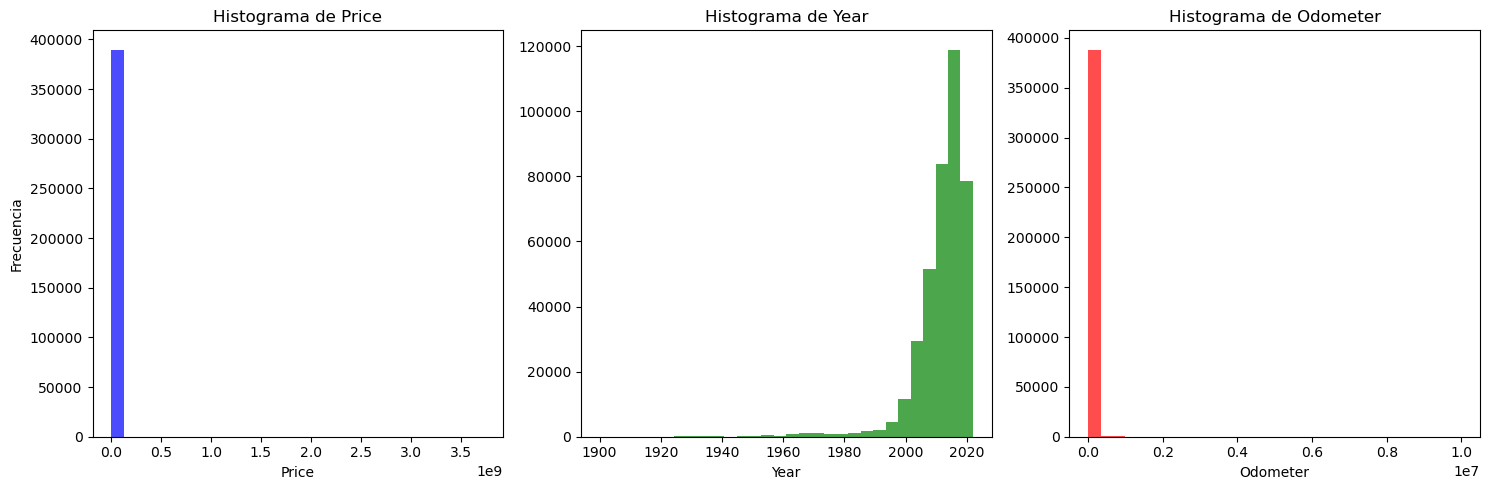

In [16]:
# Crear histogramas para las columnas 'price', 'year' y 'odometer'
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Histograma de 'price'
axes[0].hist(cars_df_final['price'], bins=30, color='blue', alpha=0.7)
axes[0].set_title('Histograma de Price')
axes[0].set_xlabel('Price')
axes[0].set_ylabel('Frecuencia')

# Histograma de 'year'
axes[1].hist(cars_df_final['year'], bins=30, color='green', alpha=0.7)
axes[1].set_title('Histograma de Year')
axes[1].set_xlabel('Year')

# Histograma de 'odometer'
axes[2].hist(cars_df_final['odometer'], bins=30, color='red', alpha=0.7)
axes[2].set_title('Histograma de Odometer')
axes[2].set_xlabel('Odometer')

# Ajustar la distribución de los gráficos
plt.tight_layout()
plt.show()

3b) Añade la columna `age`, calculada a partir de `year`, para determinar los años del vehículo y una vez obtenida, elimina la columna `year`. Genera el histograma de la nueva variable.

Año actual:  2024


C:\Users\Daniela\AppData\Local\Temp\ipykernel_9624\4222038895.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars_df_final['age'] = anio_actual - cars_df_final['year']
C:\Users\Daniela\AppData\Local\Temp\ipykernel_9624\4222038895.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars_df_final.drop(columns='year', inplace=True)


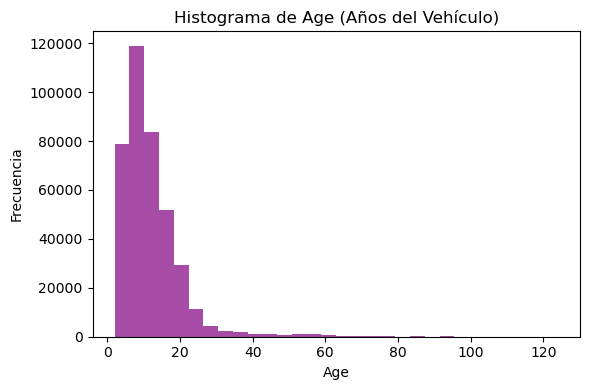

In [17]:
from datetime import datetime

# Obtener el año actual
anio_actual = datetime.now().year
print('Año actual: ',anio_actual)

# Calcular la columna 'age' a partir de 'year'
cars_df_final['age'] = anio_actual - cars_df_final['year']

# Eliminar la columna 'year'
cars_df_final.drop(columns='year', inplace=True)

# Generar el histograma de la nueva variable 'age'
plt.figure(figsize=(6, 4))
plt.hist(cars_df_final['age'], bins=30, color='purple', alpha=0.7)
plt.title('Histograma de Age (Años del Vehículo)')
plt.xlabel('Age')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

4a) Para visualizar si hay valores atípicos, genera gráficos de box plot para las tres variables (`price, age, odometer`)

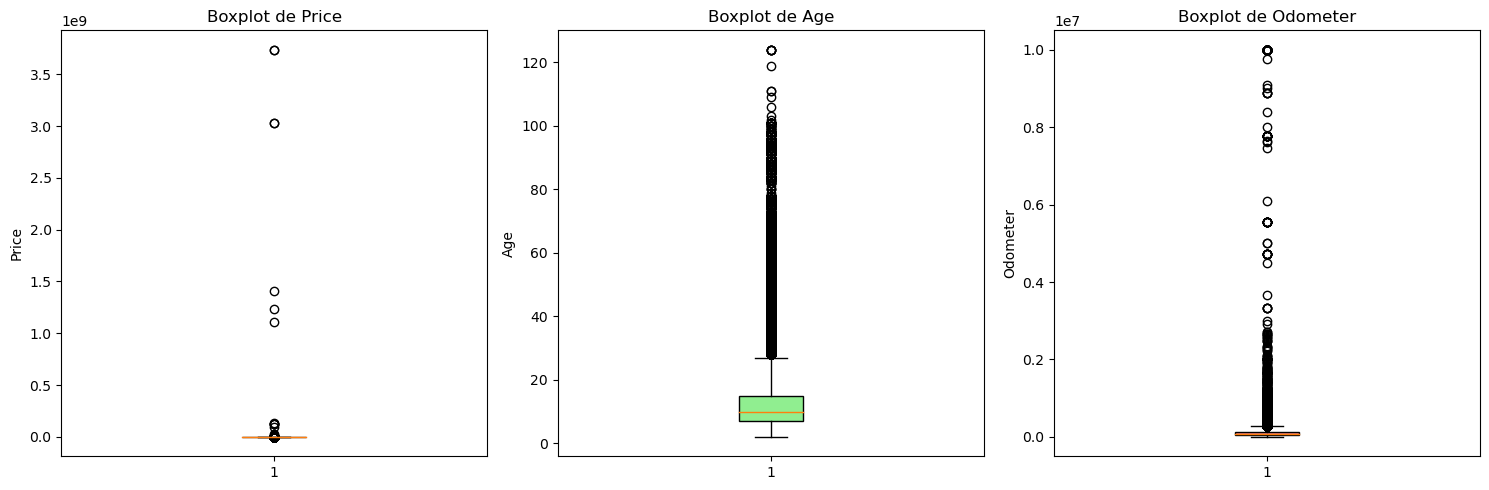

In [18]:
# Generar boxplots para las columnas 'price', 'age' y 'odometer'
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Boxplot de 'price'
axes[0].boxplot(cars_df_final['price'], patch_artist=True, boxprops=dict(facecolor='lightblue'))
axes[0].set_title('Boxplot de Price')
axes[0].set_ylabel('Price')

# Boxplot de 'age'
axes[1].boxplot(cars_df_final['age'], patch_artist=True, boxprops=dict(facecolor='lightgreen'))
axes[1].set_title('Boxplot de Age')
axes[1].set_ylabel('Age')

# Boxplot de 'odometer'
axes[2].boxplot(cars_df_final['odometer'], patch_artist=True, boxprops=dict(facecolor='lightcoral'))
axes[2].set_title('Boxplot de Odometer')
axes[2].set_ylabel('Odometer')

# Ajustar la distribución de los gráficos
plt.tight_layout()
plt.show()

Si el conjunto de outliers es “relativamente grande” (aunque sabemos que deben andar alrededor de un 5% del conjunto total de datos), realizar una investigación particular sobre ellos que permita tomar mejores decisiones.

4b) Calcula, para cada variable, el porcentaje de sus valores atípicos y elimínalos del dataframe ¿Qué porcentaje de los registros iniciales se han eliminado en total hasta ahora?

In [19]:
# Crear una copia del DataFrame antes de calcular outliers
cars_df_sin_outliers = cars_df_final.copy()
print('Shape de df antes de quitar outliers: ', cars_df_sin_outliers.shape)
print("=" * 50)  # Línea divisoria
# Calcular los outliers para cada variable
# Para 'price'
Q1_price = cars_df_sin_outliers['price'].quantile(0.25)
Q3_price = cars_df_sin_outliers['price'].quantile(0.75)
IQR_price = Q3_price - Q1_price
limite_inferior_price = Q1_price - 1.5 * IQR_price
limite_superior_price = Q3_price + 1.5 * IQR_price
outliers_price_mask = (cars_df_sin_outliers['price'] < limite_inferior_price) | \
                       (cars_df_sin_outliers['price'] > limite_superior_price)

# Para 'age'
Q1_age = cars_df_sin_outliers['age'].quantile(0.25)
Q3_age = cars_df_sin_outliers['age'].quantile(0.75)
IQR_age = Q3_age - Q1_age
limite_inferior_age = Q1_age - 1.5 * IQR_age
limite_superior_age = Q3_age + 1.5 * IQR_age
outliers_age_mask = (cars_df_sin_outliers['age'] < limite_inferior_age) | \
                    (cars_df_sin_outliers['age'] > limite_superior_age)

# Para 'odometer'
Q1_odometer = cars_df_sin_outliers['odometer'].quantile(0.25)
Q3_odometer = cars_df_sin_outliers['odometer'].quantile(0.75)
IQR_odometer = Q3_odometer - Q1_odometer
limite_inferior_odometer = Q1_odometer - 1.5 * IQR_odometer
limite_superior_odometer = Q3_odometer + 1.5 * IQR_odometer
outliers_odometer_mask = (cars_df_sin_outliers['odometer'] < limite_inferior_odometer) | \
                         (cars_df_sin_outliers['odometer'] > limite_superior_odometer)

# Contar los outliers para cada conjunto
outliers_price_only = cars_df_sin_outliers[outliers_price_mask & ~outliers_age_mask & ~outliers_odometer_mask].shape[0]
outliers_age_only = cars_df_sin_outliers[~outliers_price_mask & outliers_age_mask & ~outliers_odometer_mask].shape[0]
outliers_odometer_only = cars_df_sin_outliers[~outliers_price_mask & ~outliers_age_mask & outliers_odometer_mask].shape[0]

outliers_price_and_age = cars_df_sin_outliers[outliers_price_mask & outliers_age_mask & ~outliers_odometer_mask].shape[0]
outliers_price_and_odometer = cars_df_sin_outliers[outliers_price_mask & ~outliers_age_mask & outliers_odometer_mask].shape[0]
outliers_age_and_odometer = cars_df_sin_outliers[~outliers_price_mask & outliers_age_mask & outliers_odometer_mask].shape[0]

outliers_all_three = cars_df_sin_outliers[outliers_price_mask & outliers_age_mask & outliers_odometer_mask].shape[0]

# Calcular total de registros únicos con outliers
total_outliers_mask = outliers_price_mask | outliers_age_mask | outliers_odometer_mask
total_outliers_unique = cars_df_sin_outliers[total_outliers_mask].shape[0]

# Calcular porcentaje de outliers en cada variable
porcentaje_outliers_price = (outliers_price_mask.sum() / len(cars_df_sin_outliers)) * 100
porcentaje_outliers_age = (outliers_age_mask.sum() / len(cars_df_sin_outliers)) * 100
porcentaje_outliers_odometer = (outliers_odometer_mask.sum() / len(cars_df_sin_outliers)) * 100

# Imprimir resultados divididos
print(f"Número de outliers solo en 'price': {outliers_price_only}")
print(f"Número de outliers solo en 'age': {outliers_age_only}")
print(f"Número de outliers solo en 'odometer': {outliers_odometer_only}")
print(f"Número de outliers en 'price' y 'age': {outliers_price_and_age}")
print(f"Número de outliers en 'price' y 'odometer': {outliers_price_and_odometer}")
print(f"Número de outliers en 'age' y 'odometer': {outliers_age_and_odometer}")
print(f"Número de outliers en 'price', 'age' y 'odometer': {outliers_all_three}")
print("=" * 50)  # Línea divisoria
print(f"Número total de registros únicos con outliers: {total_outliers_unique}")
print("=" * 50)  # Línea divisoria
# Imprimir resultados finales
print(f"Número total de outliers en 'price': {outliers_price_mask.sum()}")
print(f"Número total de outliers en 'age': {outliers_age_mask.sum()}")
print(f"Número total de outliers en 'odometer': {outliers_odometer_mask.sum()}")
print("=" * 50)  # Línea divisoria
print(f"Porcentaje de outliers en 'price': {porcentaje_outliers_price:.2f}%")
print(f"Porcentaje de outliers en 'age': {porcentaje_outliers_age:.2f}%")
print(f"Porcentaje de outliers en 'odometer': {porcentaje_outliers_odometer:.2f}%")



Shape de df antes de quitar outliers:  (389604, 12)
Número de outliers solo en 'price': 6347
Número de outliers solo en 'age': 13415
Número de outliers solo en 'odometer': 2715
Número de outliers en 'price' y 'age': 288
Número de outliers en 'price' y 'odometer': 5
Número de outliers en 'age' y 'odometer': 490
Número de outliers en 'price', 'age' y 'odometer': 16
Número total de registros únicos con outliers: 23276
Número total de outliers en 'price': 6656
Número total de outliers en 'age': 14209
Número total de outliers en 'odometer': 3226
Porcentaje de outliers en 'price': 1.71%
Porcentaje de outliers en 'age': 3.65%
Porcentaje de outliers en 'odometer': 0.83%


In [35]:
# Crear una copia del DataFrame antes de eliminar outliers
cars_df_sin_outliers = cars_df_final.copy()

# Calcular los outliers para cada variable
# Para 'price'
Q1_price = cars_df_sin_outliers['price'].quantile(0.25)
Q3_price = cars_df_sin_outliers['price'].quantile(0.75)
IQR_price = Q3_price - Q1_price
limite_inferior_price = Q1_price - 1.5 * IQR_price
limite_superior_price = Q3_price + 1.5 * IQR_price
outliers_price_mask = (cars_df_sin_outliers['price'] < limite_inferior_price) | \
                       (cars_df_sin_outliers['price'] > limite_superior_price)

# Para 'age'
Q1_age = cars_df_sin_outliers['age'].quantile(0.25)
Q3_age = cars_df_sin_outliers['age'].quantile(0.75)
IQR_age = Q3_age - Q1_age
limite_inferior_age = Q1_age - 1.5 * IQR_age
limite_superior_age = Q3_age + 1.5 * IQR_age
outliers_age_mask = (cars_df_sin_outliers['age'] < limite_inferior_age) | \
                    (cars_df_sin_outliers['age'] > limite_superior_age)

# Para 'odometer'
Q1_odometer = cars_df_sin_outliers['odometer'].quantile(0.25)
Q3_odometer = cars_df_sin_outliers['odometer'].quantile(0.75)
IQR_odometer = Q3_odometer - Q1_odometer
limite_inferior_odometer = Q1_odometer - 1.5 * IQR_odometer
limite_superior_odometer = Q3_odometer + 1.5 * IQR_odometer
outliers_odometer_mask = (cars_df_sin_outliers['odometer'] < limite_inferior_odometer) | \
                         (cars_df_sin_outliers['odometer'] > limite_superior_odometer)

# Crear una máscara total para todos los outliers
total_outliers_mask = outliers_price_mask | outliers_age_mask | outliers_odometer_mask

# Filtrar el DataFrame para eliminar los outliers
cars_df_filtrado = cars_df_sin_outliers[~total_outliers_mask]

# Calcular el porcentaje de registros eliminados 
porcentaje_eliminados_totales = (1-(len(cars_df_filtrado) / len(cars_df))) * 100

# Imprimir el número total de registros eliminados y el porcentaje
print('Registros iniciales: ',len(cars_df))
print('Registros eliminados por valores faltantes:',len(cars_df)-len(cars_df_final))
print('Registros eliminados por outliers: ',len(cars_df_final) - len(cars_df_filtrado))
print('Registros totales eliminados: ', len(cars_df)-len(cars_df_filtrado))
print('Registros finales: ',len(cars_df_filtrado))
print(f"Porcentaje total de registros eliminados: {porcentaje_eliminados_totales:.2f}%")



Registros iniciales:  426880
Registros eliminados por valores faltantes: 37276
Registros eliminados por outliers:  23276
Registros totales eliminados:  60552
Registros finales:  366328
Porcentaje total de registros eliminados: 14.18%


4c) Dibuja nuevamente los histogramas para observar claramente el sesgo de las variables tras la eliminación de los outliers.

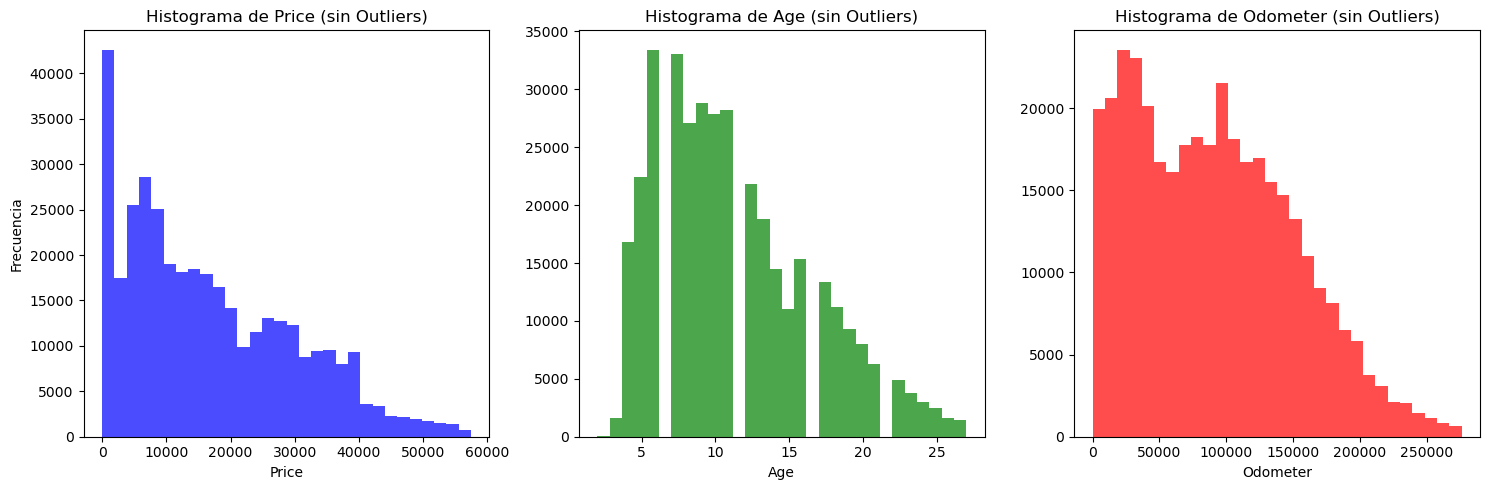

In [21]:
# Generar histogramas para las columnas 'price', 'age' y 'odometer' después de eliminar outliers
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Histograma de 'price' después de eliminar outliers
axes[0].hist(cars_df_filtrado['price'], bins=30, color='blue', alpha=0.7)
axes[0].set_title('Histograma de Price (sin Outliers)')
axes[0].set_xlabel('Price')
axes[0].set_ylabel('Frecuencia')

# Histograma de 'age' después de eliminar outliers
axes[1].hist(cars_df_filtrado['age'], bins=30, color='green', alpha=0.7)
axes[1].set_title('Histograma de Age (sin Outliers)')
axes[1].set_xlabel('Age')

# Histograma de 'odometer' después de eliminar outliers
axes[2].hist(cars_df_filtrado['odometer'], bins=30, color='red', alpha=0.7)
axes[2].set_title('Histograma de Odometer (sin Outliers)')
axes[2].set_xlabel('Odometer')

# Ajustar la distribución de los gráficos
plt.tight_layout()
plt.show()

# **Parte 2**. Ingeniería de características

## Transformando variables numéricas

La distribución de las variables determinará que método usar y en qué orden. Por ejemplo, en variables sesgadas se debe realizar primero la transformación  y luego el escalamiento, ya que el efecto deseado es "desinclinar" las distribuciones del eje y ese efecto se maximiza cuando aplica en el rango completo en comparación con aplicarlo en variables con una desviación estándar unitaria (por z-score) o variables en el rango [0,1] (por Min-Max).

Aplicar es escalamiento antes comprimiría la mayoría de los datos en un rango estrecho. Entonces se debe iniciar con transformar la característica en Gaussiana y luego escalarla.

5a) Genera gráficos Q-Q de las variables `price, age, odometer` para observar las diferencias entre sus distribuciones y la normal.


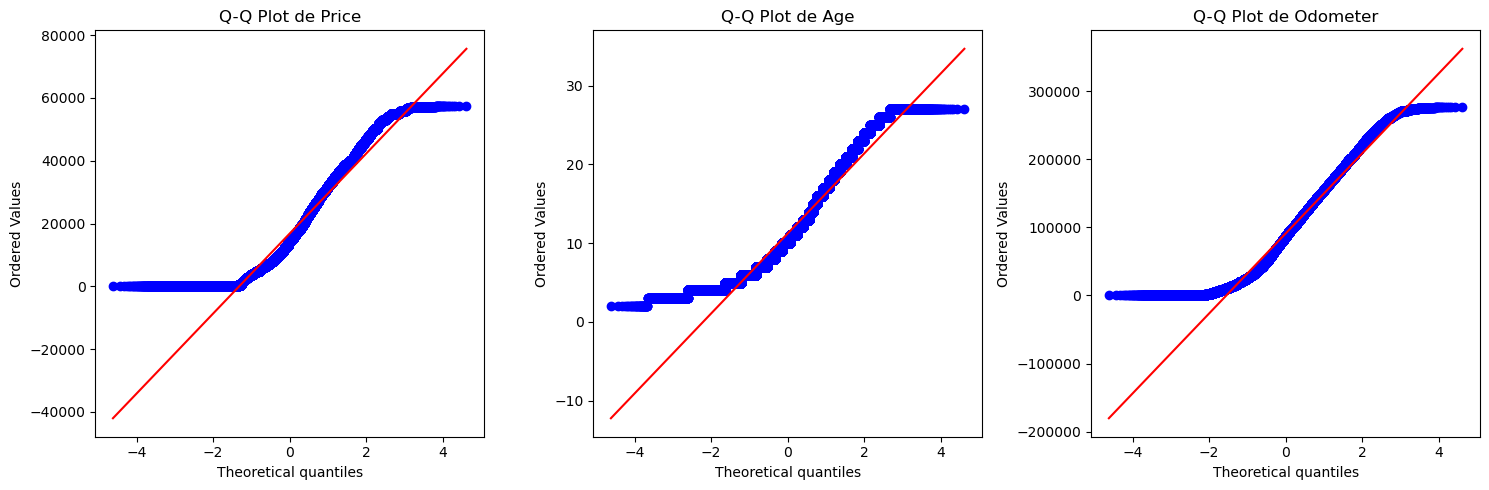

In [22]:
# Generar gráficos Q-Q para las variables 'price', 'age' y 'odometer'
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Q-Q plot para 'price'
stats.probplot(cars_df_filtrado['price'], dist="norm", plot=axes[0])
axes[0].set_title('Q-Q Plot de Price')
axes[0].get_lines()[1].set_color('red')  # Línea de referencia

# Q-Q plot para 'age'
stats.probplot(cars_df_filtrado['age'], dist="norm", plot=axes[1])
axes[1].set_title('Q-Q Plot de Age')
axes[1].get_lines()[1].set_color('red')  # Línea de referencia

# Q-Q plot para 'odometer'
stats.probplot(cars_df_filtrado['odometer'], dist="norm", plot=axes[2])
axes[2].set_title('Q-Q Plot de Odometer')
axes[2].get_lines()[1].set_color('red')  # Línea de referencia

# Ajustar la distribución de los gráficos
plt.tight_layout()
plt.show()

Las transformaciones *Box-Cox* y *Yeo-Johnson* son generalizaciones, pues incluyen casos especiales de transformaciones: logarítmica (`λ = 0`), recíproca (`λ = -1`),  raíz cuadrada (`λ = 0.5`) y más exponentes. En *Box-Cox* se evalúan varios valores de `λ` y se selecciona aquel que arroja la mejor transformación

La transformación de *Yeo-Johnson* es una extensión de la transformación de *Box-Cox* que ya no está restringida a valores positivos. En otras palabras, la transformación de *Yeo-Johnson* se puede utilizar en variables con valores cero y negativos, así como valores positivos. Cuando la variable solo tiene valores positivos, la transformación de *Yeo-Johnson* es como la transformación de *Box-Cox* de la variable más uno.

En este caso, como las variables `price` y `odometer` tienen valores de 0, utilizaremos *Yeo-Johnson*.

Recuerda que en `PowerTransformer()` el parámetro `standardize` por defecto es `True`. Con esto, después de hacer la transformación, el resultado se escala con *Z-score*, haciendo que la media sea 0 y la desviación estándar 1. Como en el ejercicio 6 ocuparás Min-Max para escalar, haz `standardize=False` para omitir el escalamiento en esta fase.

5b) Aplica la transformación Yeo-Johnson para reducir el sesgo en estas variables. Coloca el resultado en un dataframe denominado `transf_df` que contenga sólo las variables transformadas.

In [23]:
from sklearn.preprocessing import PowerTransformer

# Crear una instancia de PowerTransformer con la transformación Yeo-Johnson
pt = PowerTransformer(method='yeo-johnson', standardize=False)

# Aplicar la transformación a las variables 'price' y 'odometer'
transf_values = pt.fit_transform(cars_df_filtrado[['price', 'age', 'odometer']])

# Crear un DataFrame con los resultados de las transformaciones
transf_df = pd.DataFrame(transf_values, columns=['price', 'age', 'odometer'])

# Mostrar el DataFrame de variables transformadas
transf_df.head()

,price,age,odometer
0,194.933364,2.472590,623.675987
1,164.326657,2.803571,695.994731
2,209.204110,1.642861,346.526341
3,188.293578,2.135461,519.996769
4,137.708592,2.565181,949.705360


5c) Dibuja nuevamente los gráficos Q-Q y los histogramas para observar el efecto de la transformación.

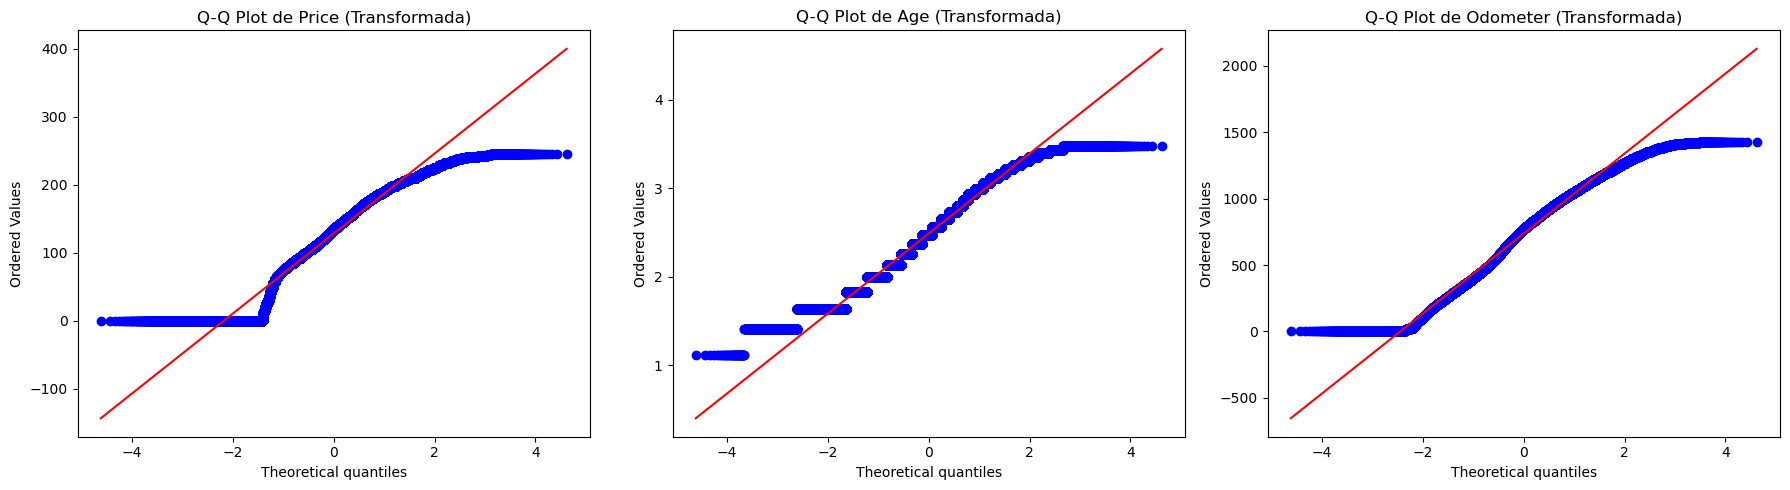

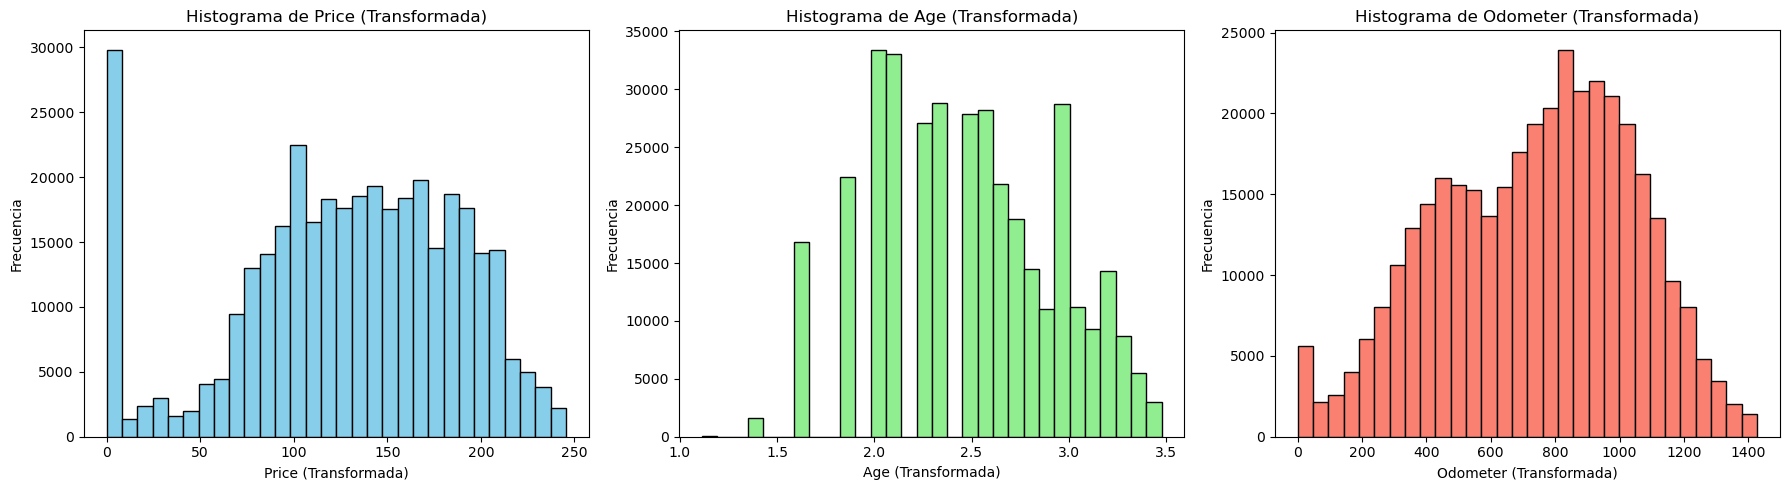

In [24]:
# Generar gráficos Q-Q para las variables transformadas 'price', 'age' y 'odometer'
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Q-Q plot para 'price' transformada
stats.probplot(transf_df['price'], dist="norm", plot=axes[0])
axes[0].set_title('Q-Q Plot de Price (Transformada)')
axes[0].get_lines()[1].set_color('red')  # Línea de referencia

# Q-Q plot para 'age' transformada
stats.probplot(transf_df['age'], dist="norm", plot=axes[1])
axes[1].set_title('Q-Q Plot de Age (Transformada)')
axes[1].get_lines()[1].set_color('red')  # Línea de referencia

# Q-Q plot para 'odometer' transformada
stats.probplot(transf_df['odometer'], dist="norm", plot=axes[2])
axes[2].set_title('Q-Q Plot de Odometer (Transformada)')
axes[2].get_lines()[1].set_color('red')  # Línea de referencia

# Ajustar la distribución de los gráficos
plt.tight_layout()
plt.show()

# Dibuja histogramas para las variables transformadas
plt.figure(figsize=(18, 5))

# Histograma para 'price' transformada
plt.subplot(1, 3, 1)
plt.hist(transf_df['price'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histograma de Price (Transformada)')
plt.xlabel('Price (Transformada)')
plt.ylabel('Frecuencia')

# Histograma para 'age' transformada
plt.subplot(1, 3, 2)
plt.hist(transf_df['age'], bins=30, color='lightgreen', edgecolor='black')
plt.title('Histograma de Age (Transformada)')
plt.xlabel('Age (Transformada)')
plt.ylabel('Frecuencia')

# Histograma para 'odometer' transformada
plt.subplot(1, 3, 3)
plt.hist(transf_df['odometer'], bins=30, color='salmon', edgecolor='black')
plt.title('Histograma de Odometer (Transformada)')
plt.xlabel('Odometer (Transformada)')
plt.ylabel('Frecuencia')

# Ajustar la distribución de los gráficos
plt.tight_layout()
plt.show()


## Escalando variables numéricas

6a) Como las tres variables poseen diferentes escalas, aplica el método Min-Max (al dataframe obtenido: `transf_df`) para que queden en el rango fijo [0 a 1]. Coloca el resultado en un dataframe denominado `minmax_df`.


In [25]:
from sklearn.preprocessing import MinMaxScaler

# Crear una instancia de MinMaxScaler
scaler = MinMaxScaler()

# Aplicar el escalado Min-Max a las variables en transf_df
minmax_values = scaler.fit_transform(transf_df)

# Crear un DataFrame con los resultados del escalado
minmax_df = pd.DataFrame(minmax_values, columns=transf_df.columns)

# Mostrar el DataFrame escalado
minmax_df.head()

,price,age,odometer
0,0.794060,0.574773,0.437060
1,0.669384,0.714813,0.487739
2,0.852192,0.223713,0.242839
3,0.767013,0.432133,0.364403
4,0.560956,0.613949,0.665534


6b) Dibuja nuevamente los histogramas para verificar que el escalamiento no cambia la distribución.

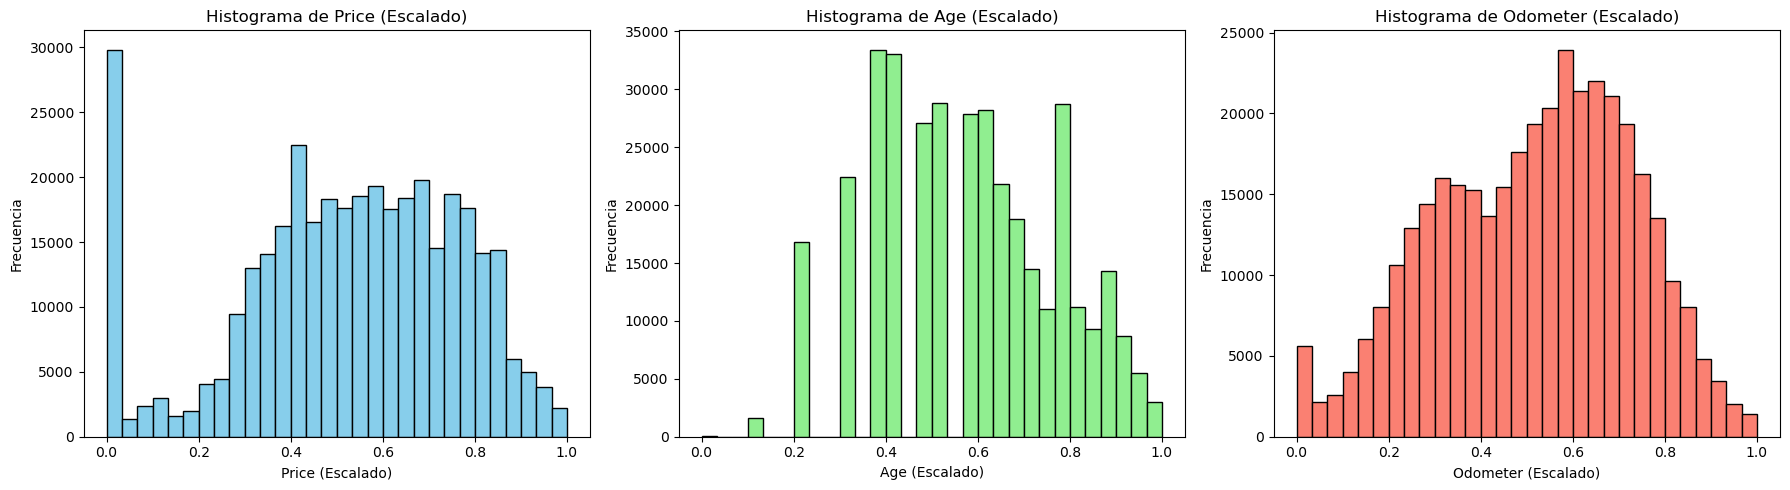

In [26]:
# Dibuja histogramas para las variables escaladas en minmax_df
plt.figure(figsize=(18, 5))

# Histograma para 'price' escalado
plt.subplot(1, 3, 1)
plt.hist(minmax_df['price'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histograma de Price (Escalado)')
plt.xlabel('Price (Escalado)')
plt.ylabel('Frecuencia')

# Histograma para 'age' escalado
plt.subplot(1, 3, 2)
plt.hist(minmax_df['age'], bins=30, color='lightgreen', edgecolor='black')
plt.title('Histograma de Age (Escalado)')
plt.xlabel('Age (Escalado)')
plt.ylabel('Frecuencia')

# Histograma para 'odometer' escalado
plt.subplot(1, 3, 3)
plt.hist(minmax_df['odometer'], bins=30, color='salmon', edgecolor='black')
plt.title('Histograma de Odometer (Escalado)')
plt.xlabel('Odometer (Escalado)')
plt.ylabel('Frecuencia')

# Ajustar la distribución de los gráficos
plt.tight_layout()
plt.show()

## Codificando variables categóricas


7a) Utiliza el método `describe()` para obtener el resumen de las estadísticas descriptivas en las variables categóricas.

In [27]:
# Obtener el resumen de estadísticas descriptivas
resumen_categoricas = cars_df_filtrado.describe(include='object')
resumen_categoricas

,region,region_url,manufacturer,model,fuel,title_status,transmission,type,state
count,366328,366328,366328,366328,366328,366328,366328,366328,366328
unique,404,413,40,19097,5,6,3,13,51
top,columbus,https://grandrapids.craigslist.org,ford,f-150,gas,clean,automatic,sedan,ca
freq,3188,2737,61660,7436,312085,354717,291628,154259,42062


7b) Según la cardinalidad observada, separa en dos listas (`highly_cardinal_variables` y `few_cardinal_variables`) los nombres de las variables con alta cardinalidad y baja cardinalidad respectivamente. Una variable es considerada de alta cardinalidad cuando tiene cientos de valores únicos.

In [28]:
# Inicializar listas para variables de alta y baja cardinalidad
highly_cardinal_variables = []
few_cardinal_variables = []

# Separar variables según su cardinalidad
for col in resumen_categoricas.columns:
    unique_count = resumen_categoricas[col]['unique']
    if unique_count > 100:
        highly_cardinal_variables.append(col)
    else:
        few_cardinal_variables.append(col)

# Imprimir resultados
print("Variables de alta cardinalidad:", highly_cardinal_variables)
print("Variables de baja cardinalidad:", few_cardinal_variables)

Variables de alta cardinalidad: ['region', 'region_url', 'model']
Variables de baja cardinalidad: ['manufacturer', 'fuel', 'title_status', 'transmission', 'type', 'state']


7c) Visualiza en gráficos de barras la frecuencias de las categorías para las variables con baja cardinalidad (en `few_cardinal_variables`)

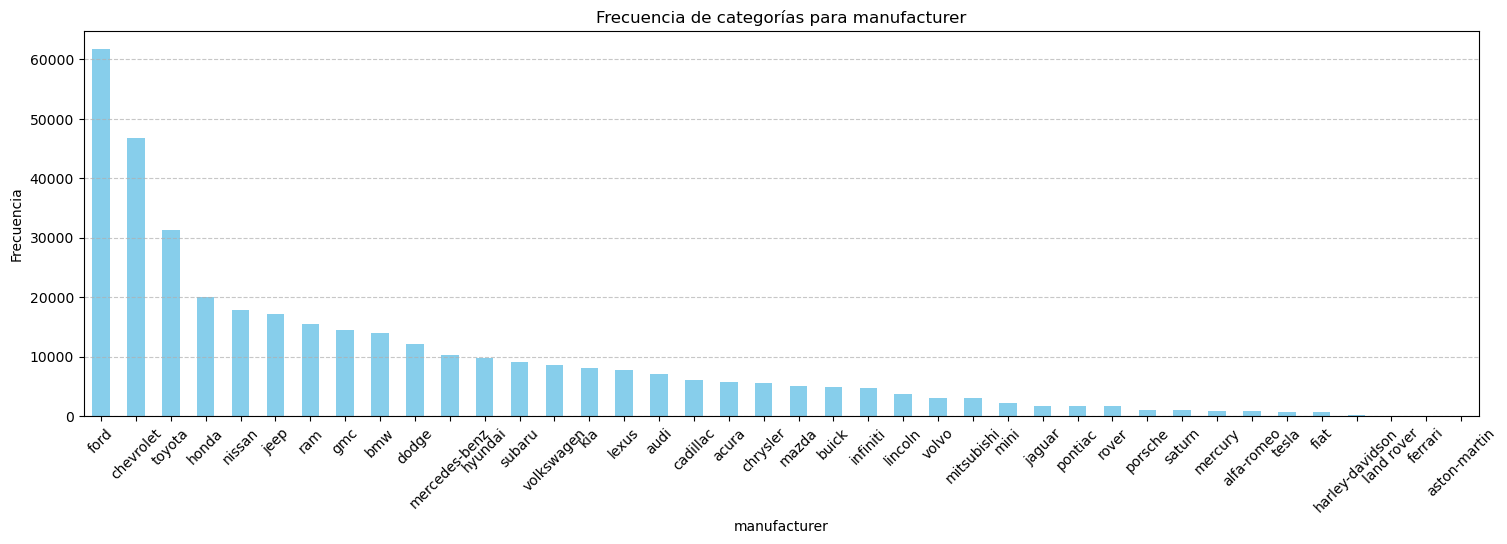

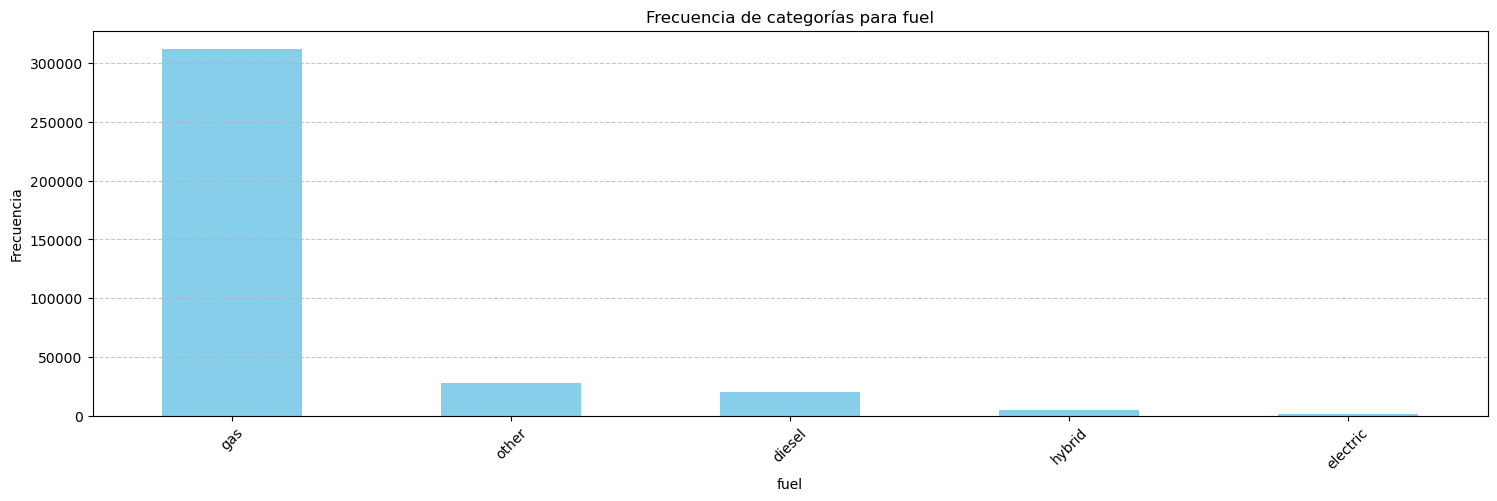

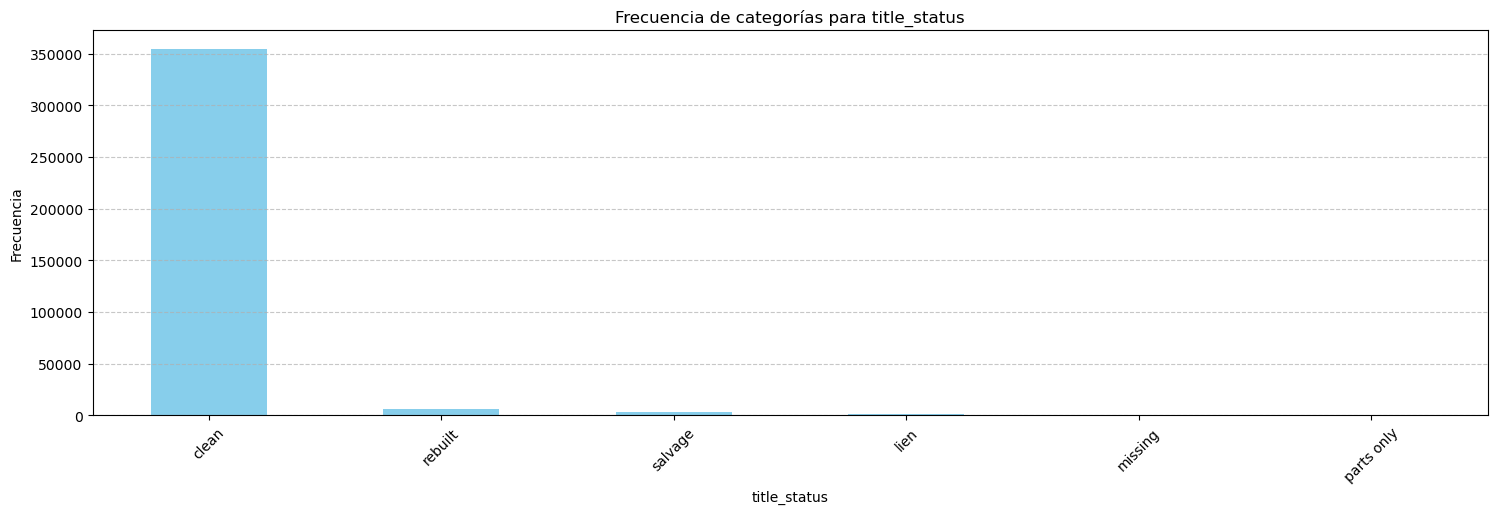

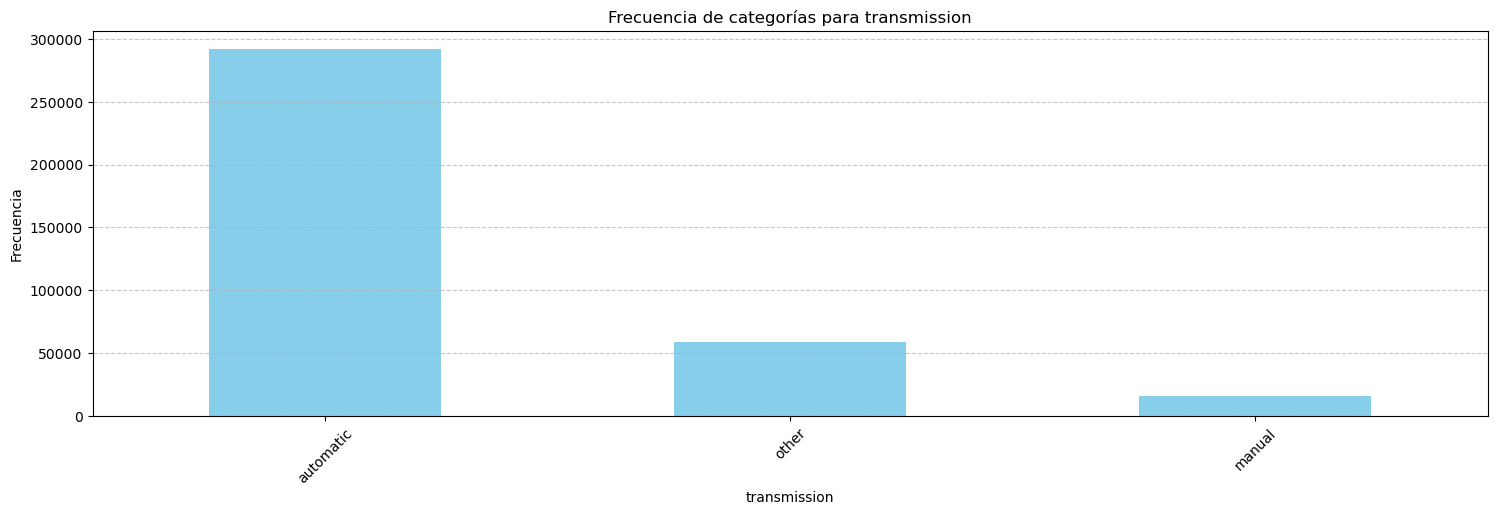

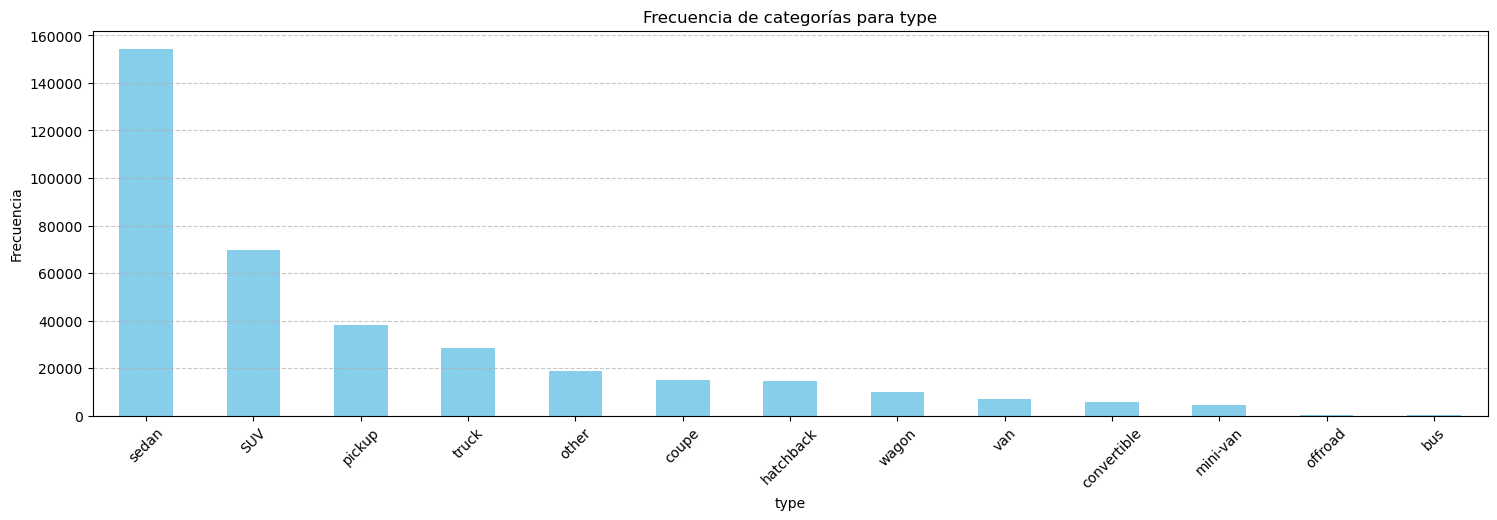

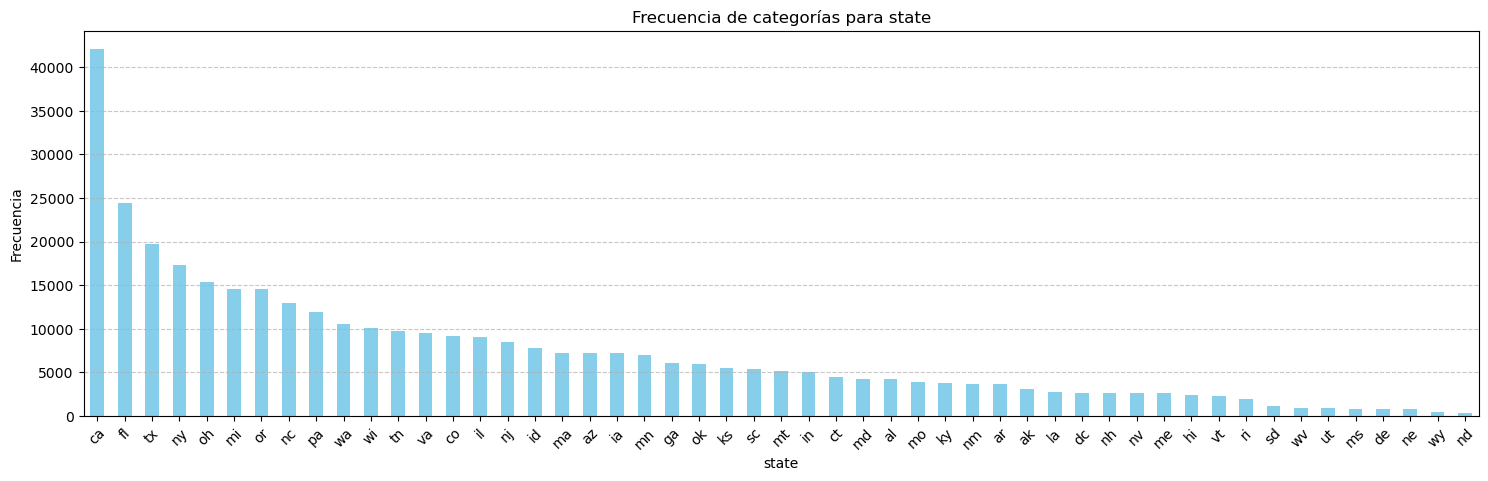

In [29]:

# Graficar frecuencias de categorías para las variables con baja cardinalidad
for variable in few_cardinal_variables:
    plt.figure(figsize=(18, 5))
    cars_df_filtrado[variable].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f'Frecuencia de categorías para {variable}')
    plt.xlabel(variable)
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45)  # Rota las etiquetas del eje x si son muchas
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

8. Aplica codificación *one-hot* a las variables en `few_cardinal_variables`, borrando la primera categoría (`drop='first'`). Coloca el resultado en un dataframe denominado `onehot_df`.

In [30]:
# Aplicar codificación one-hot y eliminar la primera categoría
onehot_df = pd.get_dummies(cars_df_filtrado[few_cardinal_variables], drop_first=True)

# Mostrar el DataFrame resultante
onehot_df.head()

,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,manufacturer_chevrolet,manufacturer_chrysler,manufacturer_dodge,manufacturer_ferrari,...,state_sd,state_tn,state_tx,state_ut,state_va,state_vt,state_wa,state_wi,state_wv,state_wy
27,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
28,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
30,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
31,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


9. Aplica codificación binaria a las variables en `highly_cardinal_variables`. Coloca el resultado en un dataframe denominado `binary_df`.

In [31]:
import category_encoders as ce

In [32]:
# Crear un codificador binario
encoder = ce.BinaryEncoder(cols=highly_cardinal_variables)

# Aplicar la codificación binaria
binary_df = encoder.fit_transform(cars_df_filtrado[highly_cardinal_variables])

# Mostrar el DataFrame resultante
binary_df.head()

,region_0,region_1,region_2,region_3,region_4,region_5,region_6,region_7,region_8,region_url_0,...,model_5,model_6,model_7,model_8,model_9,model_10,model_11,model_12,model_13,model_14
27,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
28,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
29,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,1
30,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
31,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1


10. Concatena los dataframes obtenidos: `minmax_df` (cuyas variables numéricas ya están transformadas y escaladas) y las codificaciones anteriores (`onehot_df` y `binary_df`). Toma en cuenta que si los índices de los dataframes no coinciden, la concatenación no se realizará correctamente. Utiliza `reset_index(drop=True, inplace=True)` para restablecer los índices.

In [33]:
final_df = pd.concat([minmax_df, onehot_df, binary_df], axis=1)

# Restablecer los índices
final_df.reset_index(drop=True, inplace=True)

# Mostrar el DataFrame final
final_df.head()

,price,age,odometer,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,manufacturer_chevrolet,...,model_5,model_6,model_7,model_8,model_9,model_10,model_11,model_12,model_13,model_14
0,0.794060,0.574773,0.437060,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.669384,0.714813,0.487739,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.852192,0.223713,0.242839,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.767013,0.432133,0.364403,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.560956,0.613949,0.665534,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
final_df.shape

(417673, 148)